# **Esquema de la Tabla**

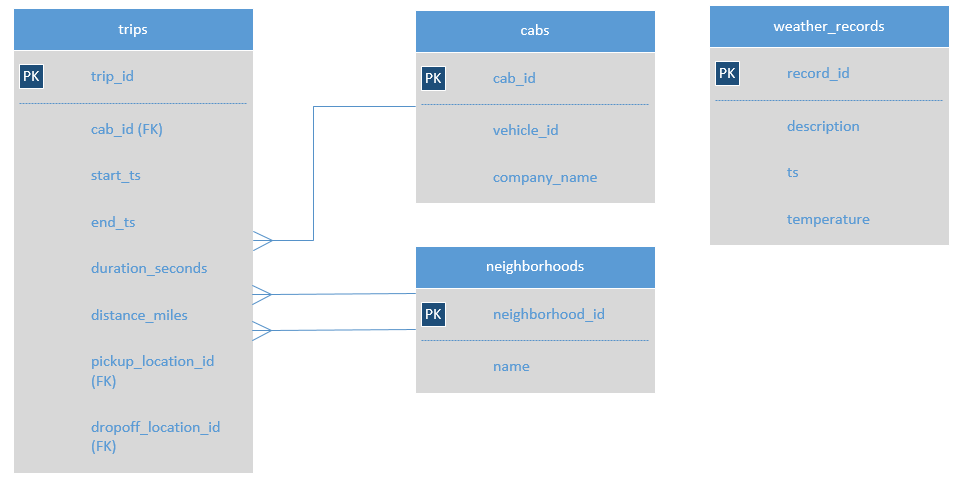

# **Ejercicio 1**

1. **Imprime** el campo **company_name**.
2. Encuentra la **cantidad de viajes** en taxi para **cada compañía** de taxis para el **15 y 16 de noviembre de 2017**, asigna al campo resultante el nombre **trips_amount** e **imprímelo** también.
3. **Ordena** los resultados por el campo **trips_amount** en orden **descendente**.

In [ ]:
SELECT company_name, COUNT (trip_id) AS trips_amount
FROM trips
LEFT JOIN cabs
    ON cabs.cab_id = trips.cab_id
WHERE start_ts >= '2017-11-15'
    AND start_ts < '2017-11-17'
GROUP BY company_name
ORDER BY trips_amount DESC;

# **Ejercicio 2**

1. Encuentra la **cantidad de viajes** para cada empresa de taxis cuyo nombre contenga las palabras **"Yellow"** o **"Blue"** del **1 al 7 de noviembre de 2017**.

2. **Nombra** la variable resultante **trips_amount**.

3. **Agrupa** los resultados por el campo **company_name**.

In [ ]:
SELECT company_name, COUNT(trip_id) AS trips_amount
FROM trips
LEFT JOIN cabs ON cabs.cab_id = trips.cab_id
WHERE start_ts >= '2017-11-01'
    AND start_ts < '2017-11-08'
    AND (company_name LIKE '%Yellow%' OR company_name LIKE '%Blue%')
GROUP BY company_name
ORDER BY trips_amount DESC;

# **Ejercicio 3**

1. **Del 1 al 7 de noviembre de 2017**, las empresas de taxis más populares fueron **Flash Cab** y **Taxi Affiliation Services**.
  - **Encuentra** el **número de viajes** de estas dos empresas y asigna a la variable resultante el nombre **trips_amount**.

2. **Junta** los viajes de todas las demás empresas en el grupo **"Other"**.
3. **Agrupa** los datos por **nombres de empresas de taxis**.
  - Asigna el nombre **company** al campo con **nombres de empresas de taxis**.

4. **Ordena** el resultado en orden **descendente** por **trips_amount**.

In [ ]:
SELECT
    CASE
        WHEN company_name = 'Flash Cab' THEN 'Flash Cab'
        WHEN company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services'
        ELSE 'Other'
    END AS company,
    COUNT(trip_id) AS trips_amount
FROM trips
LEFT JOIN cabs ON cabs.cab_id = trips.cab_id
WHERE start_ts >= '2017-11-01'
    AND start_ts < '2017-11-08'
GROUP BY
    CASE
        WHEN company_name = 'Flash Cab' THEN 'Flash Cab'
        WHEN company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services'
        ELSE 'Other'
    END
ORDER BY trips_amount DESC;

# **Ejercicio 4**

1. **Recupera los identificadores** de los barrios de **O'Hare** y **Loop** de la tabla **neighborhoods**.

In [ ]:
SELECT neighborhood_id, name
FROM neighborhoods
WHERE name LIKE '%Hare' OR name = 'Loop';

# **Ejercicio 5**

1. Para **cada hora** recupera los registros de **condiciones meteorológicas** de la tabla **weather_records**.
2. Usando el operador **CASE**, divide todas las horas en dos grupos:
  - **Bad** si el campo description contiene las palabras **rain o storm**, y
  - **Good** para **los demás**.
3. **Nombra** el campo resultante **weather_conditions**.

La tabla final debe incluir dos campos: **fecha y hora** (ts) y **weather_conditions**.

In [ ]:
SELECT
    ts AS fecha_y_hora,
    CASE
        WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions
FROM weather_records;

# **Ejercicio 6**

1. **Recupera** de la tabla de **trips** todos los viajes que **comenzaron en el Loop** (pickup_location_id: 50) **el sábado** y **terminaron en O'Hare** (dropoff_location_id: 63).
2. **Obtén** las condiciones climáticas **para cada viaje**. Utiliza el método que aplicaste en la tarea anterior.
3. **Recupera** también la **duración de cada viaje**. **Ignora** los viajes para los que **no hay datos disponibles** sobre las **condiciones climáticas**.

- Las columnas de la tabla deben estar en el siguiente orden:
  - **start_ts**
  - **weather_conditions**
  - **duration_seconds**

4. Ordena por **trip_id**.

In [ ]:
SELECT
    start_ts,
    T.weather_conditions,
    duration_seconds
FROM
    trips
INNER JOIN (
    SELECT
        ts,
        CASE
            WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
            ELSE 'Good'
        END AS weather_conditions
    FROM
        weather_records
) T on T.ts = trips.start_ts
WHERE
    pickup_location_id = 50 AND dropoff_location_id = 63 AND EXTRACT (DOW from trips.start_ts) = 6
ORDER BY trip_id